In [10]:
import pandas as pd
from ipywidgets import interact
from sklearn.tree import DecisionTreeClassifier as DecisionTree

In [11]:
# importando nosso dataset;
zoo = pd.read_csv(".\Data\zoo.csv")     
# características dos animais para o teste;
inputs = zoo.drop(columns=["class_type","animal_name"])
# resultado esperado;
target = zoo["class_type"]

In [12]:
import import_ipynb
from _Funções import Showtree
from _Funções import Previsão

In [13]:
@interact(k = (3,len(inputs.columns), 1))
def f(k=5):
    Previsão(DecisionTree,k,tree_upgrade=True);

interactive(children=(IntSlider(value=5, description='k', max=16, min=3), Output()), _dom_classes=('widget-int…

In [15]:
import matplotlib.pyplot as plt

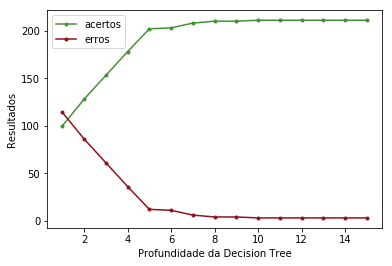

In [16]:
lista_k=[]
lista_erros=[]
lista_acertos=[]
for k in range (1,len(inputs.columns)):
    acertos=0
    model = DecisionTree(max_depth=k)
    model.fit(inputs,target);
    model.score(inputs,target);
    for i in range(len(zoo)):
        if (model.predict([inputs.iloc[i]])[0])==(zoo.iloc[i]['class_type']):
            acertos+=1
    erros=len(zoo)-acertos
    lista_k.append(k)
    lista_erros.append(erros)
    lista_acertos.append(acertos)
plt.plot(lista_k,lista_acertos,color="#459035",marker=".",label="acertos")
plt.plot(lista_k,lista_erros,color="#8F111D",marker=".",label="erros")
plt.xlabel("Profundidade da Decision Tree");
plt.ylabel("Resultados");
plt.legend();